<a href="https://colab.research.google.com/github/stevengiacalone/Python-workshop/blob/main/Session_3_Plotting_and_Databases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

The first topic of today's session is plotting and visualization. We'll be using the popular package Matplotlib to explore a few different ways of plotting data. This tutorial is adapted from the official Matplotlib Pyplot tutorial, which can be found here: https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py

Let's start by importing the package.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Plotting a line

We'll start with something simple and plot a straight line.

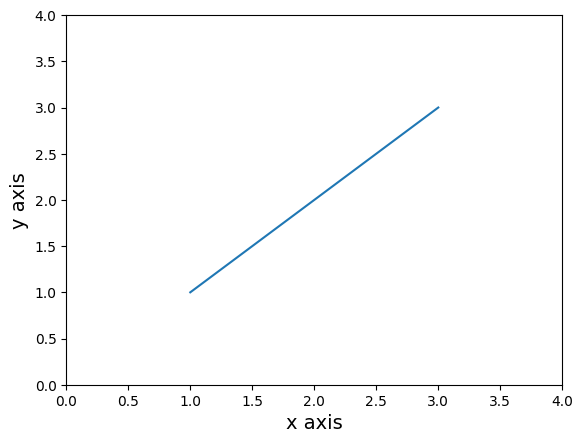

In [2]:
# first, we need some data to plot
x_data = np.array([1,2,3])
y_data = np.array([1,2,3])

# this function adds the data to the plot
plt.plot(x_data, y_data)

# these functions define the axis labels - you can make them anything
plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

# these functions define the x and y limits of the plot
# if omitted, matplotlib will automatically set the limits
plt.xlim([0,4])
plt.ylim([0,4])

# this function will tell Python to display the plot
plt.show()

We can edit the format of the line using a number of keywords in the .plot() function. This is especially useful when you have multiple lines on the same plot and want to distinguish them.

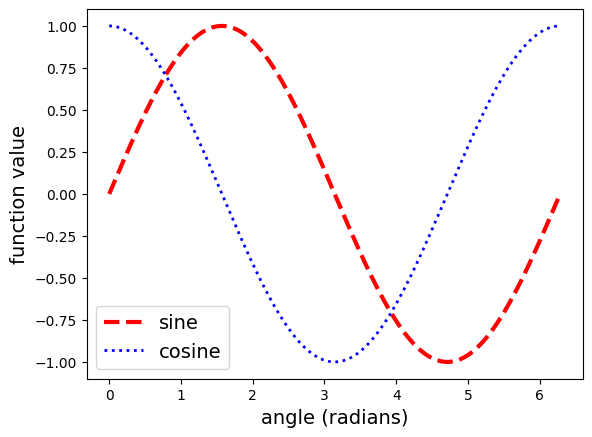

In [3]:
x_data = np.linspace(0, 2*np.pi, 1000)
y_data_sin = np.sin(x_data)
y_data_cos = np.cos(x_data)

plt.plot(x_data, y_data_sin, color="red", linestyle="--", linewidth=3, label="sine")
plt.plot(x_data, y_data_cos, color="blue", linestyle=":", linewidth=2, label="cosine")

plt.xlabel("angle (radians)", fontsize=14)
plt.ylabel("function value", fontsize=14)

# the legend function adds the labels defined above to the plot
plt.legend(loc="lower left", fontsize=14)

plt.show()

#### Plotting a scatterplot

You can also plot a scatter plot using the .scatter() function instead of the .plot() function.

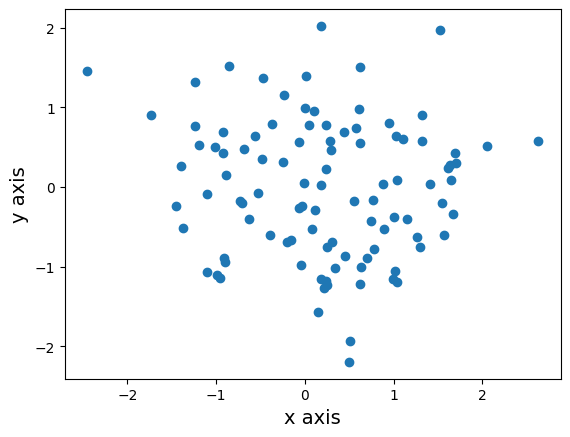

In [4]:
# draw a random sample from a Gaussian distribution for x and y
x_data = np.random.normal(loc=0, scale=1, size=100)
y_data = np.random.normal(loc=0, scale=1, size=100)

plt.scatter(x_data, y_data)

plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

plt.show()

You can set the sizes, colors, and shapes of the points to add even more information.

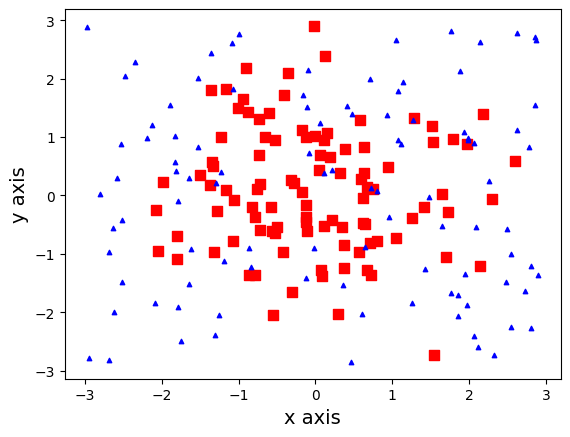

In [5]:
# draw a random sample from a Gaussian distribution for x and y
x_data1 = np.random.normal(loc=0, scale=1, size=100)
y_data1 = np.random.normal(loc=0, scale=1, size=100)

# draw a random sample from a uniform distribution for x and y
x_data2 = np.random.uniform(low=-3, high=3, size=100)
y_data2 = np.random.uniform(low=-3, high=3, size=100)

plt.scatter(x_data1, y_data1, s=50, c="red", marker="s")
plt.scatter(x_data2, y_data2, s=10, c="blue", marker="^")

plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

plt.show()

You can also have the points of a given data set change in size or color based on another array of values. For example, we will plot a linear set of points but have them grow in size like x$^3$ We will also have them change in color based on the x value.

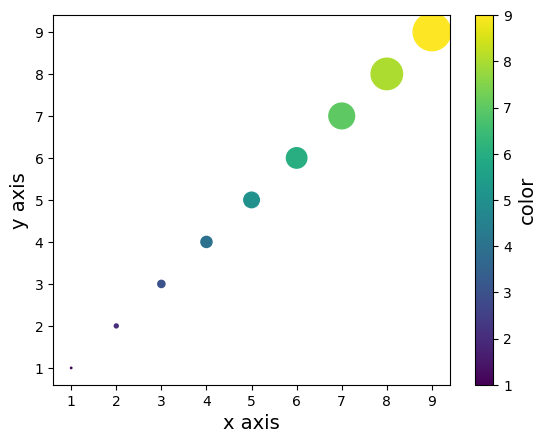

In [6]:
x_data = np.arange(1,10)
y_data = np.arange(1,10)
size_data = x_data**3

plt.scatter(x_data, y_data, s=size_data, c=x_data, marker="o")

# we can add a colorbar to display what the colors mean
plt.colorbar().set_label(label="color", fontsize=14)

plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

plt.show()

#### Plotting a histogram

Histograms are useful to displaying how data is distributed. Let's start by plotting a basic Gaussian distribution.

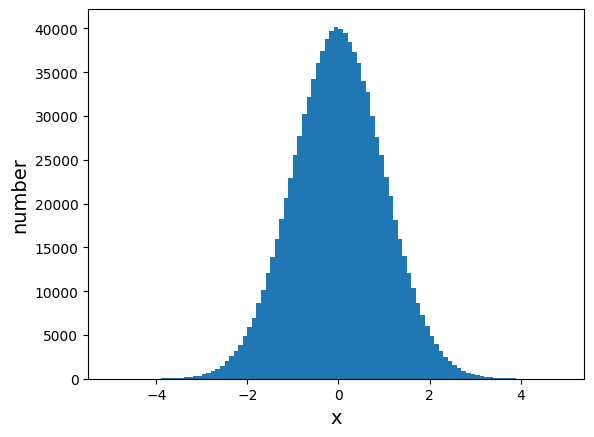

In [7]:
# draw samples from a Gaussian distribution (i.e., a bell curve)
data = np.random.normal(loc=0, scale=1, size=1000000) # loc is the mean and scale is the standard deviation of the distribution

plt.hist(data, bins=np.arange(-5,5,0.1))

plt.xlabel("x", fontsize=14)
plt.ylabel("number", fontsize=14)

plt.show()

Using NumPy, we can determine the locations of the 68th, 95th, and 99.7th percentiles (i.e., $1 \sigma$, $2 \sigma$, and $3 \sigma$ from the mean). Let's do that and plot them on top of the distribution.

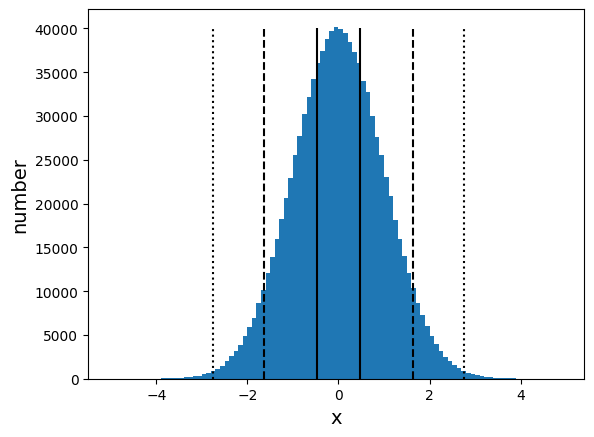

In [8]:
onesig = np.percentile(data, q=[32, 68])
twosig = np.percentile(data, q=[5, 95])
threesig = np.percentile(data, q=[0.3, 99.7])

plt.hist(data, bins=np.arange(-5,5,0.1))
plt.vlines(x=onesig, ymin=0, ymax=40000, color="k", linestyle="-")
plt.vlines(x=twosig, ymin=0, ymax=40000, color="k", linestyle="--")
plt.vlines(x=threesig, ymin=0, ymax=40000, color="k", linestyle=":")

plt.xlabel("x", fontsize=14)
plt.ylabel("number", fontsize=14)

plt.show()

Lastly, let's plot the probability distribution function (PDF) and cumulative distribution function (CDF) of the Gaussian distribution above. This concept will come up again in future sessions.

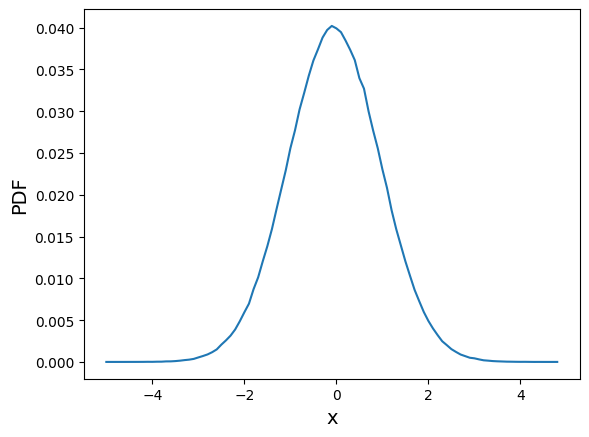

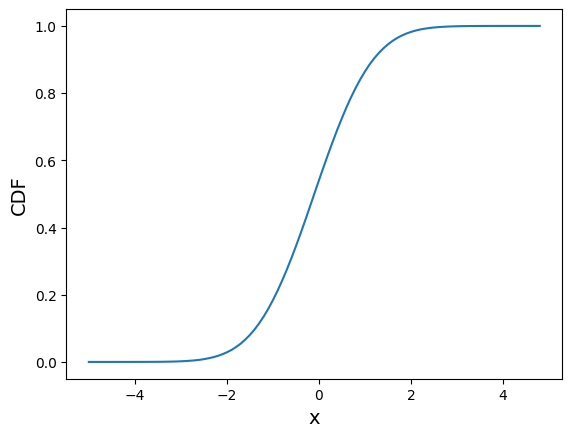

In [9]:
counts, hist_bins = np.histogram(data, bins=np.arange(-5,5,0.1))
PDF = counts/np.sum(counts)
CDF = np.cumsum(PDF)

plt.plot(hist_bins[:-1], PDF)
plt.xlabel("x", fontsize=14)
plt.ylabel("PDF", fontsize=14)
plt.show()


plt.plot(hist_bins[:-1], CDF)
plt.xlabel("x", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.show()

#### Plotting multi-panel figures

We can make a multi-panel figure using the .subplots() function. In the following example, we will make a 2x2 figure (4 plots in total).

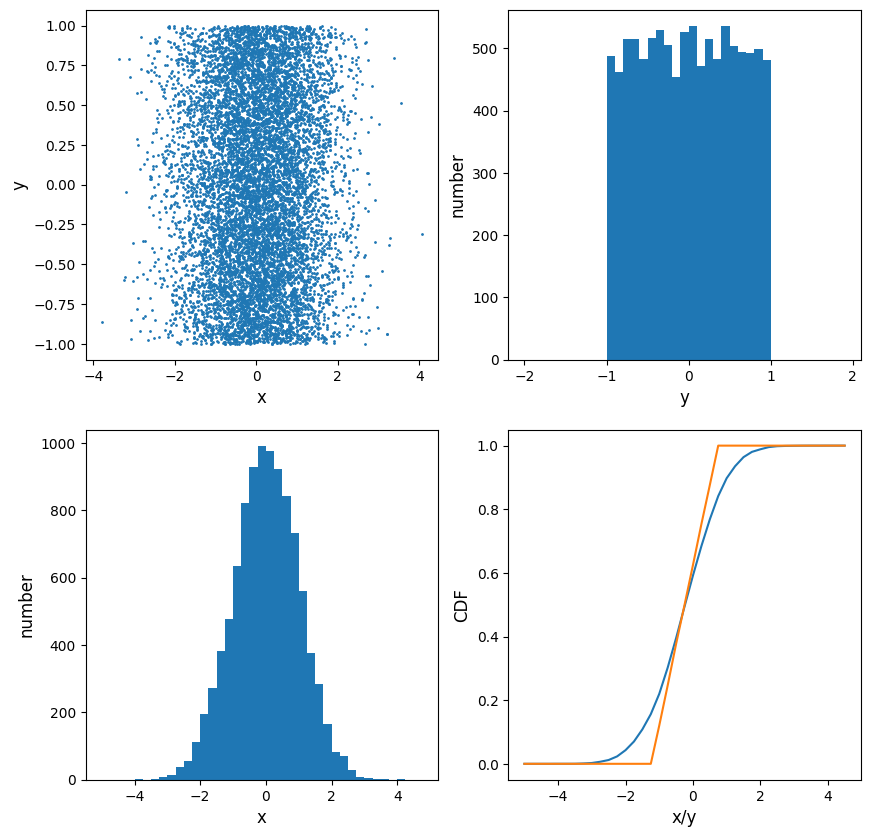

In [10]:
# first, define some data
x_data = np.random.normal(loc=0, scale=1, size=10000)
y_data = np.random.uniform(low=-1, high=1, size=10000)

# first, define the figure and the number of rows/columns
fig, ax = plt.subplots(2, 2, figsize=(10,10))

# plot a scatterplot of the data in the first panel (index 0,0)
ax[0,0].scatter(x_data, y_data, s=1)
ax[0,0].set_xlabel("x", fontsize=12)
ax[0,0].set_ylabel("y", fontsize=12)

# in the second panel, plot of histogram of the y data (index 0,1)
ax[0,1].hist(y_data, bins=np.arange(-2,2,0.1))
ax[0,1].set_xlabel("y", fontsize=12)
ax[0,1].set_ylabel("number", fontsize=12)

# in the third panel, plot of histogram of the x data (index 1,0)
ax[1,0].hist(x_data, bins=np.arange(-5,5,0.25))
ax[1,0].set_xlabel("x", fontsize=12)
ax[1,0].set_ylabel("number", fontsize=12)

# in the fourth panel, plot the CDFs of the x and y data together (index 1,1)
x_count, x_hist_bins = np.histogram(x_data, bins=np.arange(-5,5,0.25))
x_CDF = np.cumsum(x_count/np.sum(x_count))
y_count, y_hist_bins = np.histogram(y_data, bins=np.arange(-5,5,0.25))
y_CDF = np.cumsum(y_count/np.sum(y_count))
ax[1,1].plot(x_hist_bins[:-1], x_CDF)
ax[1,1].plot(y_hist_bins[:-1], y_CDF)
ax[1,1].set_xlabel("x/y", fontsize=12)
ax[1,1].set_ylabel("CDF", fontsize=12)

plt.show()

#### Plotting in 3D

Plotting in 3D comes in handy when, well, our data has 3 dimension! Let's see an example of how it's done (we'll use this later in the notebook). More examples can be found here: https://matplotlib.org/stable/gallery/mplot3d/index.html

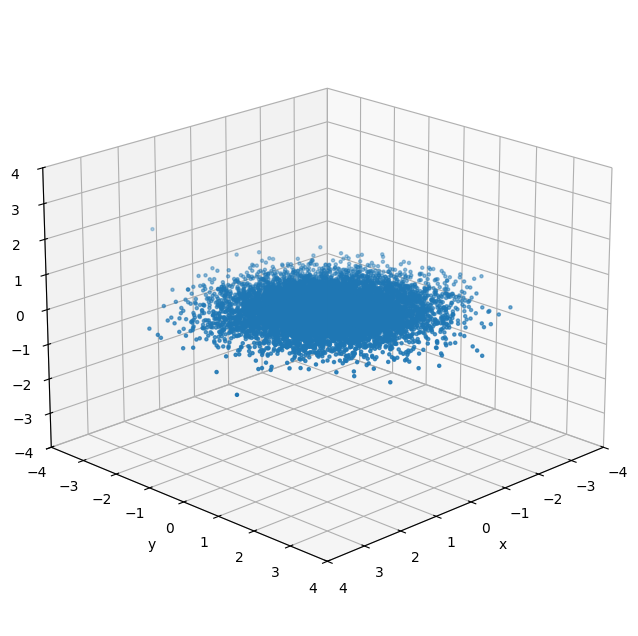

In [11]:
# define some 3D data
x_data = np.random.normal(loc=0, scale=1, size=10000)
y_data = np.random.normal(loc=0, scale=1, size=10000)
z_data = np.random.normal(loc=0, scale=0.1, size=10000)

# define the figure and add an extra axis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# plot it just as you would a normal scatterplot
ax.scatter(x_data, y_data, z_data, marker=".")

# set the viewing angle with the following
ax.view_init(azim=45, elev=20)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([-4,4])

plt.show()

# Pandas

Next, we'll do a brief crash course of Pandas, a Python databasing and data analysis library. More details on Pandas can be found here: https://pandas.pydata.org/docs/user_guide/10min.html

The most important feature of Pandas as the DataFrame object. DataFrames allow us to easily store, access, and manipulate data in large tables. Let's make a DataFrame and see how we work with it.

In [12]:
import pandas as pd

In [13]:
# dictionaries can be saved as DataFrames
# let's make a dictionary containing the ages, heights, and favorite numbers of 100 people
this_dict = {"age": np.random.uniform(low=21, high=81, size=100),
             "height": np.random.normal(loc=180, scale=10, size=100),
             "fave_number": np.random.randint(low=0, high=10, size=100)}

# now convert it to a DataFrame with Pandas
df = pd.DataFrame(this_dict)

# let's see how it looks
df

,age,height,fave_number
0,72.360458,180.040172,9
1,60.265917,194.122030,4
2,69.835137,177.733880,7
3,21.692766,185.580601,2
4,67.993686,186.789260,8
...,...,...,...
95,26.371151,179.274160,7
96,73.043943,178.017341,4
97,54.565364,189.811472,5
98,54.668424,168.316333,4


You can access specific columns as numpy arrays like so

In [14]:
ages = df["age"].values
heights = df["height"].values
fave_numbers = df["fave_number"].values

print(ages)

[72.36045774 60.26591684 69.83513656 21.6927656  67.99368592 24.5501446
 45.30735404 22.14102291 58.43538077 68.96229532 43.48356402 80.69730079
 70.84382885 33.60840809 35.35902788 57.03706809 79.03386606 56.73416435
 30.52555065 75.6358864  50.74260304 39.42839418 31.78153137 57.99462571
 40.44710282 34.30952284 77.88059746 78.22045959 21.4543344  79.86388458
 68.84833985 51.13198414 71.69060948 58.79145772 76.08618082 63.29342652
 70.01933838 65.25562132 34.69722473 25.868386   37.08177512 60.33266103
 63.87195189 66.63972975 47.27493708 31.91896429 34.93940237 47.30028019
 46.05848957 79.10332508 51.04912916 53.04231984 71.26521853 23.20947478
 25.95933255 75.56816634 26.80714836 56.08545244 51.65259439 22.83716407
 46.7576626  74.38103776 51.15422803 58.02072381 44.53606624 77.62995659
 29.55802514 62.59785103 78.22637821 59.16582911 70.63381424 27.16261474
 71.62363922 69.04563785 24.565902   79.53736269 23.3113271  68.92571526
 69.74722148 37.72672291 76.42042185 35.88046912 77.

You can return the data for a specific row using .loc

In [15]:
this_person = df.iloc[10] # row 10
this_person

,10
age,43.483564
height,177.465671
fave_number,5.000000


You can filter data using normal boolean masking methods. Let's say we want a new DataFrame only containing people older than 50 years.

In [16]:
df2 = df[df["age"].values > 50]
df2

,age,height,fave_number
0,72.360458,180.040172,9
1,60.265917,194.122030,4
2,69.835137,177.733880,7
4,67.993686,186.789260,8
8,58.435381,177.331092,6
...,...,...,...
94,58.379809,173.741519,8
96,73.043943,178.017341,4
97,54.565364,189.811472,5
98,54.668424,168.316333,4


You can return some basic statistics from the dataframe using the .describe() method.

In [17]:
df.describe()

,age,height,fave_number
count,100.000000,100.000000,100.000000
mean,53.980853,180.308933,4.730000
std,18.934637,10.674696,2.950278
min,21.454334,145.716217,0.000000
25%,36.781449,174.466194,2.000000
50%,56.409808,179.854659,5.000000
75%,70.949176,187.073893,7.000000
max,80.697301,212.441492,9.000000


We're going to stop there in the interest of time, but know that there is much more that can be done with Pandas! If you want to become a data scientists, Pandas proficiency will be essential during the interview process.

# Exercise

Now let's put it all together. In this exercise, we're going to query data from Gaia to identify and plot the Hyades cluster - a 625 million-year-old open stellar cluster approximately 150 lightyears away from the Solar System. Gaia is a European Space Agency mission that is measuring the 3D locations, motions, and properties of over one billion (!) stars in the Milky Way galaxy -- essentially creating the most accurate map of our galaxy ever created. This mission has enabled countless of new studies and discoveries, with many more to come in the next decade. If you want to learn more about Gaia, here is a good summary video from the PBS Space Time YouTube channel: https://www.youtube.com/watch?v=Jdy09y0A4t0

First, we need to query and download the data. Do do so, run the cells below. It will take a few minutes, but by the time it's done you will have a dataframe with nearly 100,000 stars.

This file contains the coordinates, parallaxes (which can be converted to distance), and proper motions (motions on the plane of the sky) for the 2000 brightest stars within 6 degrees of the center of Hyades (Right Ascension = 67.447 degrees, Declination = 16.948 degrees).

In [80]:
pip install astroquery astropy

We can list the column names like so

In [ ]:

from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

# Define the center of the Hyades cluster
hyades_center = SkyCoord(ra=66.75*u.deg, dec=15.87*u.deg, frame='icrs')

# Gaia DR3 catalog name
gaia_table = "gaiaedr3.gaia_source"

# Construct the ADQL query
query = f"""
SELECT *
FROM {gaia_table}
WHERE phot_g_mean_mag < 16
AND 1 = CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', {hyades_center.ra.deg}, {hyades_center.dec.deg}, 6)
)
"""

# Launch the query (asynchronous allows for larger datasets)
job = Gaia.launch_job_async(query)
results = job.get_results()

df = results.to_pandas()

Here is a brief description of the columns we care about:
- designation: The source ID of the star and the data release (DR) the data corresponds to.
- source_id: The identified of the star in the Gaia catalogue.
- ra: The right ascention of the star (in degrees).
- dec: The declination of the star (in degrees).
- parallax: The parallax of the star (1/parallax is distance in parsecs).
- pmra: The proper motion of the star in the RA direction (in milli-arcseconds per year).
- pmdec: The proper motion of the star in the Dec direction (in milli-arcseconds per year).
- phot_g_mean_mag: The apparent G magnitude of the star (i.e., the apparent brightness of the star as measured using the G filter).
- phot_bp_mean_mag: The apparent BP magnitude of the star.
- phot_rp_mean_mag: The apparent RP magnitude of the star.

Let's start by pruning the dataframe to get rid of stars that don't have coordinates, proper motions, parallaxes, or teff/logg estimates.

In [44]:
df = df.dropna(subset=["ra", "dec", "pmra", "pmdec", "parallax"])
df

,designation,source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,phot_bp_mean_mag,...,ebpminrp_gspphot,target_id,target_ra,target_dec,target_parallax,target_pm_ra,target_pm_dec,target_radial_velocity,epoch,target_separation (deg)
0,Gaia DR3 3312954501586560384,3312954501586560384,67.614733,16.782101,0.793223,-0.920970,-2.747981,0.958703,13.659338,14.103626,...,0.4885,Hyades,67.6143,16.7786,21.052,104.92,-28.0,37.97,2000,0.003626
1,Gaia DR3 3312954432867084160,3312954432867084160,67.628720,16.770417,1.005251,-0.021334,-6.978685,1.013728,14.833032,15.358495,...,0.4382,Hyades,67.6143,16.7786,21.052,104.92,-28.0,37.97,2000,0.015585
2,Gaia DR3 3312955532378711168,3312955532378711168,67.588379,16.803739,1.179938,7.504170,-6.424203,1.636568,14.563169,15.057928,...,0.5050,Hyades,67.6143,16.7786,21.052,104.92,-28.0,37.97,2000,0.035741
3,Gaia DR3 3312942097721015168,3312942097721015168,67.616587,16.728575,0.983863,11.594744,-11.029769,1.022770,14.184160,14.714495,...,0.4122,Hyades,67.6143,16.7786,21.052,104.92,-28.0,37.97,2000,0.049930
4,Gaia DR3 3312954948263150848,3312954948263150848,67.633507,16.831679,1.634133,5.539608,-12.360370,1.030577,13.817670,14.349612,...,0.4865,Hyades,67.6143,16.7786,21.052,104.92,-28.0,37.97,2000,0.056141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Gaia DR3 3314135750735301376,3314135750735301376,67.991500,17.607167,0.100796,0.032762,-1.182913,1.101905,14.252249,15.236619,...,0.7580,Hyades,67.6143,16.7786,21.052,104.92,-28.0,37.97,2000,0.903460
1995,Gaia DR3 3312662753048188288,3312662753048188288,68.000406,15.954181,0.716638,-0.959325,-6.668194,1.015610,15.063014,15.645130,...,0.7031,Hyades,67.6143,16.7786,21.052,104.92,-28.0,37.97,2000,0.903523
1996,Gaia DR3 3313777554759375232,3313777554759375232,66.772513,17.189319,1.012915,1.613514,-14.151746,0.995562,15.319907,15.875862,...,0.4549,Hyades,67.6143,16.7786,21.052,104.92,-28.0,37.97,2000,0.904258
1997,Gaia DR3 3313358846989209344,3313358846989209344,68.432902,17.232230,0.830971,-1.104073,1.961413,1.003331,15.930057,16.541927,...,0.4975,Hyades,67.6143,16.7786,21.052,104.92,-28.0,37.97,2000,0.904407


#### Task 1: Removing unassociated stars.

Hyades only contains about 500 stars, but our DataFrame above has many more. This means there are likely some stars in the DataFrame that are not actually members of the Hyades cluster. Using histograms and scatter plots, locate and remove stars that are unlikely to actually be Hyades members. Note that all stars in the cluster should have roughly the same proper motions.

Try it yourself first, then "unhide" the cells below to reveal the solution.

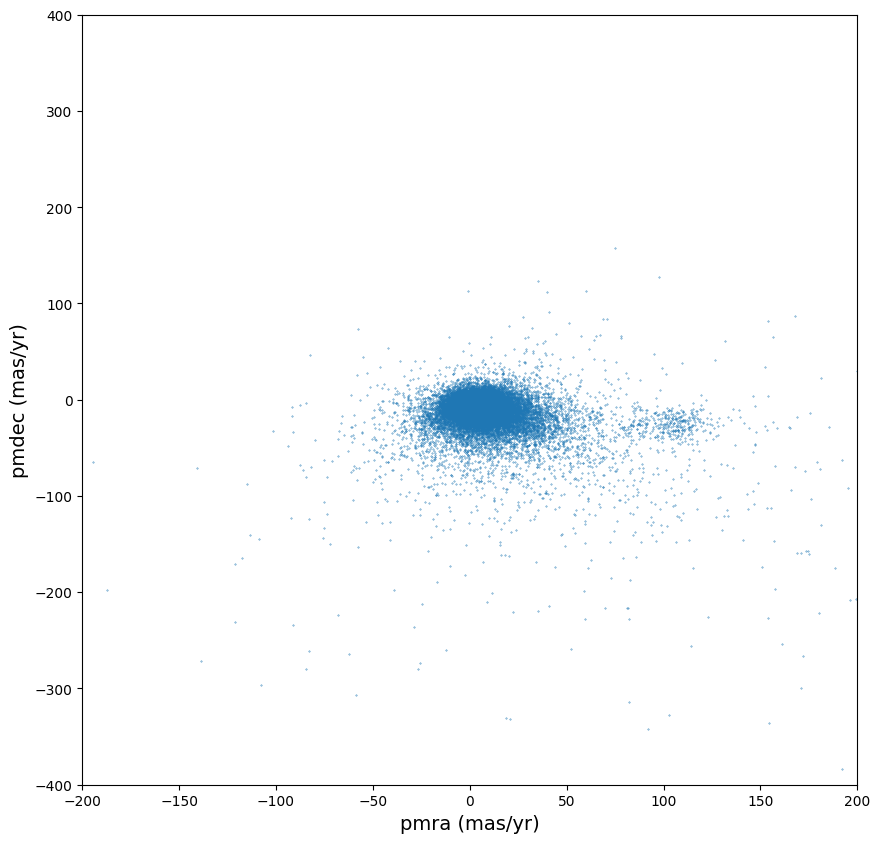

In [97]:
pmra_data = df["pmra"].values
pmdec_data = df["pmdec"].values

plt.figure(figsize=(10,10))

plt.scatter(pmra_data, pmdec_data, s=0.1)
plt.xlim([-200,200])
plt.ylim([-400,400])
plt.xlabel("pmra (mas/yr)", fontsize=14)
plt.ylabel("pmdec (mas/yr)", fontsize=14)

plt.show()

We can see that there's a little bubble on of stars with pmra around 100 mas/yr. Those are the cluster members! Let's cut out all of the non-member stars.

In [87]:
df = df[
    (df["pmra"].values > 75) & (df["pmra"].values < 150) &
    (df["pmdec"].values > -75) & (df["pmdec"].values < 75)
    ]
df

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
10,1636042515805110273,Gaia EDR3 45038302672569984,45038302672569984,725366940,2016.0,61.963984,0.043915,14.580503,0.029565,5.904528,...,NaN,NaN,0,NaN,NaN,NaN,177.894559,-26.686256,62.767217,-6.247567
20,1636042515805110273,Gaia EDR3 45041498128248576,45041498128248576,869303463,2016.0,61.746945,0.015699,14.598713,0.010566,5.386312,...,87.111275,0.255582,7,6250.0,4.5,0.0,177.724214,-26.832248,62.563188,-6.190041
260,1636042515805110273,Gaia EDR3 45117226991576448,45117226991576448,49695067,2016.0,61.690179,0.039335,15.066567,0.024523,4.132925,...,NaN,NaN,0,NaN,NaN,NaN,177.290715,-26.564084,62.598151,-5.720265
322,1636042515805110273,Gaia EDR3 45142202225729024,45142202225729024,53691006,2016.0,61.924827,0.045909,15.161949,0.024304,23.045802,...,NaN,NaN,0,NaN,NaN,NaN,177.378323,-26.331143,62.839811,-5.669381
323,1636042515805110273,Gaia EDR3 45142206521351552,45142206521351552,36940397,2016.0,61.925521,0.027922,15.162686,0.016121,22.850537,...,37.932079,0.465525,9,6750.0,4.5,0.0,177.378201,-26.330153,62.840612,-5.668783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73847,1636042515805110273,Gaia EDR3 144574788234755200,144574788234755200,1572902128,2016.0,67.932201,0.044116,21.154464,0.022748,16.342155,...,NaN,NaN,0,NaN,NaN,NaN,176.487116,-18.098728,69.487413,-0.727084
73848,1636042515805110273,Gaia EDR3 144574788234755584,144574788234755584,1379108045,2016.0,67.930710,0.042338,21.153082,0.022283,16.482431,...,NaN,NaN,0,NaN,NaN,NaN,176.487294,-18.100680,69.485831,-0.728243
74267,1636042515805110273,Gaia EDR3 144663157183364864,144663157183364864,318147267,2016.0,67.406359,0.017477,21.668437,0.009208,23.436976,...,NaN,NaN,0,NaN,NaN,NaN,175.741693,-18.142542,69.081157,-0.145026
74270,1636042515805110273,Gaia EDR3 144663814316653824,144663814316653824,65915000,2016.0,67.452656,0.017045,21.734022,0.009350,23.856825,...,37.522728,0.731090,21,4000.0,3.0,0.0,175.718303,-18.067325,69.133682,-0.086777


Looks like we got rid of a few dozen stars that are unlikely to be members. Let's replot the distribution and see how they look.

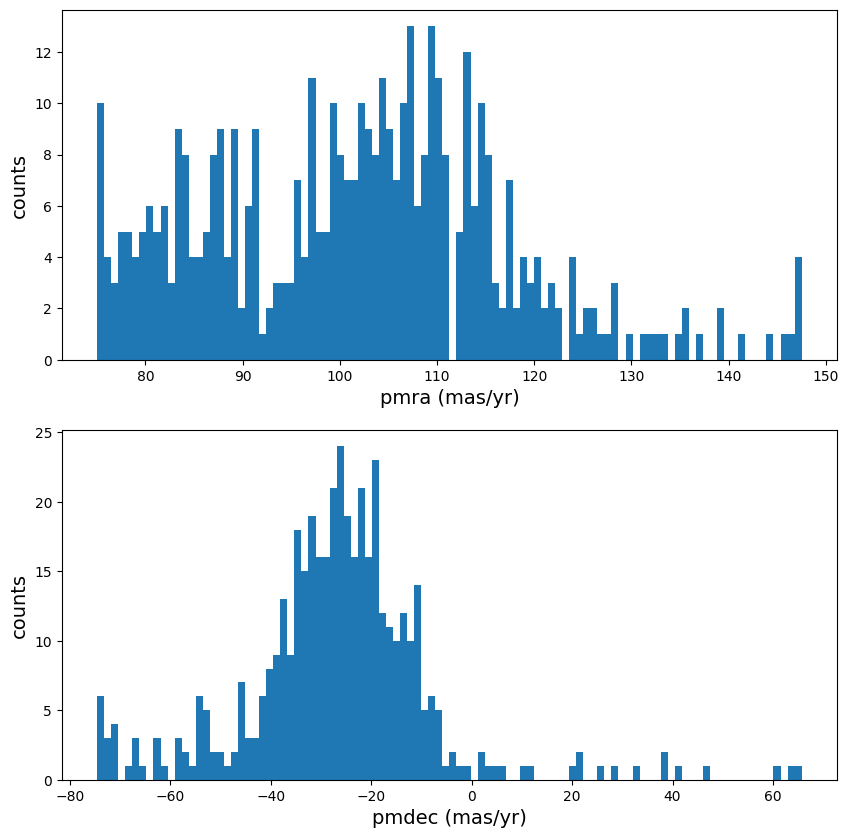

In [89]:
pmra_data = df["pmra"].values
pmdec_data = df["pmdec"].values

fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0].hist(pmra_data, bins=100)
ax[0].set_xlabel("pmra (mas/yr)", fontsize=14)
ax[0].set_ylabel("counts", fontsize=14)

ax[1].hist(pmdec_data, bins=100)
ax[1].set_xlabel("pmdec (mas/yr)", fontsize=14)
ax[1].set_ylabel("counts", fontsize=14)

plt.show()

#### Task 2: Plotting the color-magnitude diagram.

Color-magnitude diagrams are used to calculate the ages and average metallicities of stellar clusters (by comparing against stellar evolution models). Make a scatter plot with the following: BP-RP on the x axis and M_g on the y axis. Color the points according to teff_gspphot. What does the plot look like? We'll discuss the answer together afterwards.

Note that M_G is the absolute magnitude of the star in the G filter. This is calculated using the following equation:

M_G = G + 5 + 5*log10(parallax/1000)

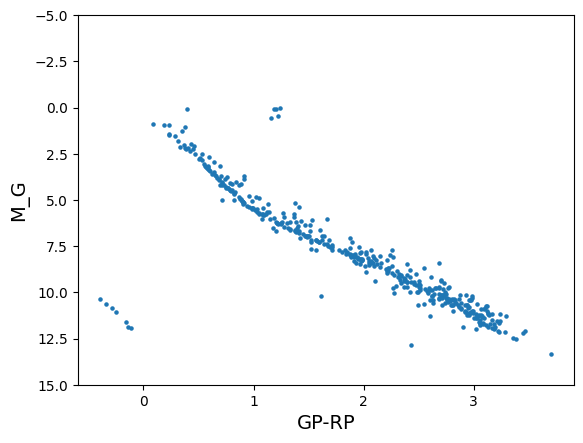

In [88]:
G_data = df["phot_g_mean_mag"].values
parallax = df["parallax"].values
M_G = G_data + 5 + 5*np.log10(parallax/1000)
BP_data = df["phot_bp_mean_mag"].values
RP_data = df["phot_rp_mean_mag"].values

plt.scatter(BP_data-RP_data, M_G, s=5)

plt.xlabel("GP-RP", fontsize=14)
plt.ylabel("M_G", fontsize=14)

plt.ylim([15,-5])
plt.show()

#### Task 3: Plotting the cluster in 3D space.

Lastly, let's plot the cluster in 3D using the RA, Dec, and distances from the DataFrame. Let's again color them by surface temperature.

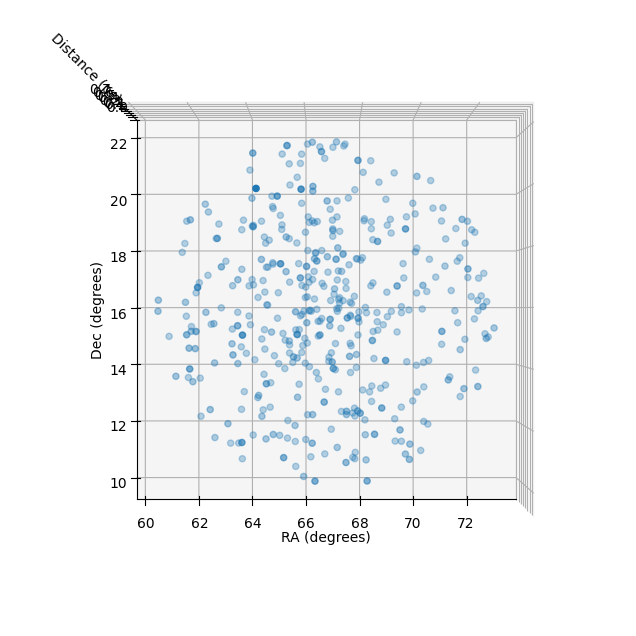

In [94]:
ra_data = df["ra"].values
dec_data = df["dec"].values
distance_data = 1/df["parallax"].values

# define the figure and add an extra axis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# plot it just as you would a normal scatterplot
ax.scatter(ra_data, dec_data, distance_data)

# set the viewing angle with the following
ax.view_init(azim=-90, elev=90)

ax.set_xlabel('RA (degrees)')
ax.set_ylabel('Dec (degrees)')
ax.set_zlabel('Distance (pc)')


plt.show()